## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

**What is the no. of elements in the training and testing datasets?**

In [54]:
print(f'No. of elements in training dataset: {len(X_train)}')
print(f'No. of elements in testing dataset: {len(X_test)}')

No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


**What are the labels in the dataset?**

In [55]:
print(f'Training labels: {set(y_train)}')
print(f'Testing labels: {set(y_test)}')

Training labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Testing labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


**Visualise one image for each label.**

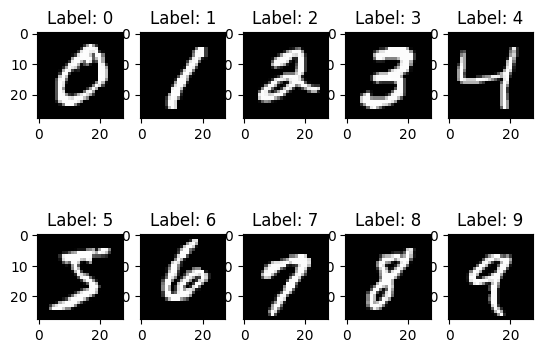

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[y_train == i][0], cmap='gray')
    plt.title(f"Label: {i}")

plt.show()

**One-hot encode the y labels.**

In [64]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

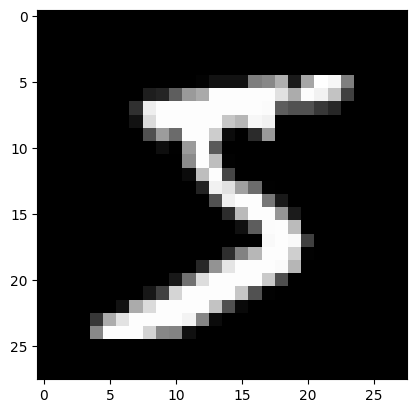

In [58]:
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [59]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [60]:
X_train = X_train/255
X_test = X_test/255

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [61]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Fit the model and plot the training history.**

In [65]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9873 - val_loss: 0.0392


**Now test your model on the training dataset and print the classification matrix.**

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


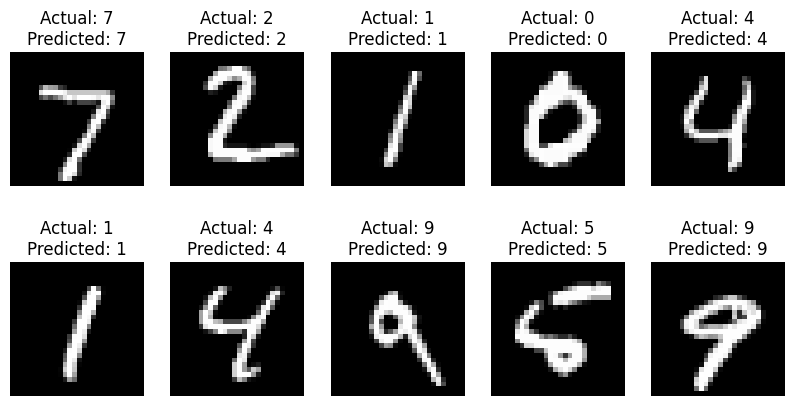

In [69]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test.argmax(axis=1)[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')